<a href="https://colab.research.google.com/github/Zelkova46/kenkyushimasu_Nikkei225/blob/main/multivariate_Cleaned_Nikkei225_daily_forecastingNclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap penelitian

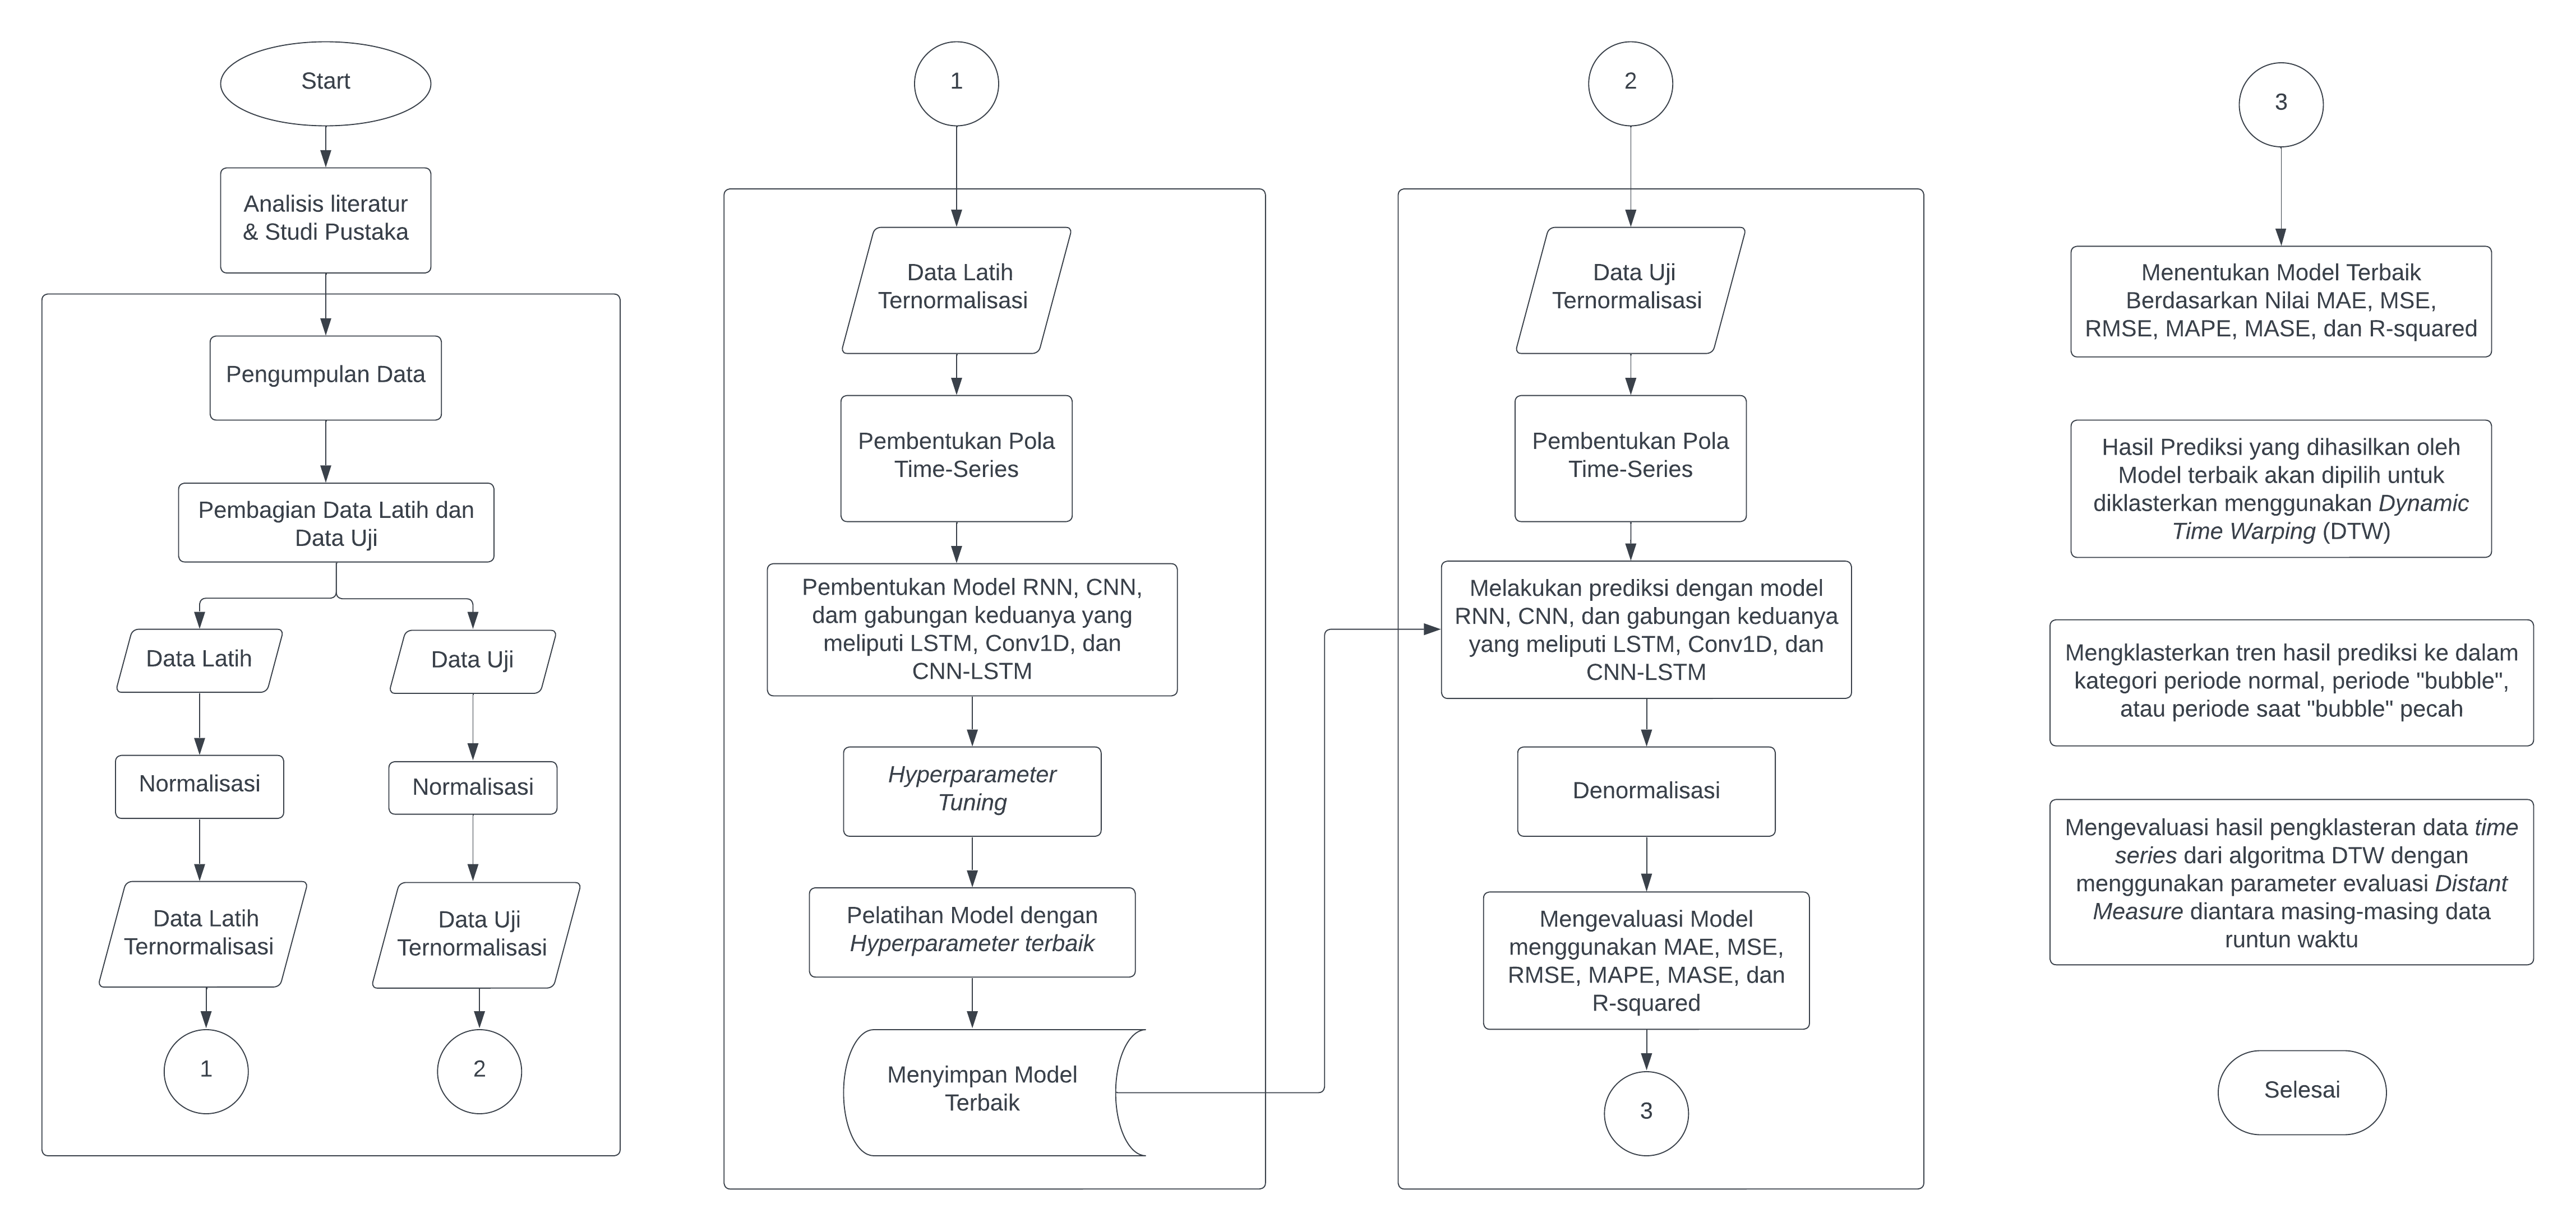

## Get Data

Sumber data: https://finance.yahoo.com/quote/%5EN225?p=%5EN225


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [1]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/%5EN225_daily.csv

--2024-02-22 00:09:49--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/%5EN225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1112773 (1.1M) [text/plain]
Saving to: ‘^N225_daily.csv’

^N225_daily.csv     100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2024-02-22 00:09:49 (57.2 MB/s) - ‘^N225_daily.csv’ saved [1112773/1112773]



## Import data time series dengan pandas

In [2]:
# import dengan pandas
import pandas as pd
# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/^N225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-25,33414.511719,33414.511719,33221.570313,33254.031250,33254.031250,58900000.0
2023-12-26,33295.679688,33312.261719,33181.359375,33305.851563,33305.851563,68300000.0
2023-12-27,33532.968750,33755.750000,33521.519531,33681.238281,33681.238281,93700000.0
2023-12-28,33477.468750,33571.730469,33411.238281,33539.621094,33539.621094,73300000.0
2023-12-29,33458.640625,33652.710938,33305.171875,33464.171875,33464.171875,89000000.0


In [3]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14351 entries, 1968-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       13773 non-null  float64
 1   High       13773 non-null  float64
 2   Low        13773 non-null  float64
 3   Close      13773 non-null  float64
 4   Adj Close  13773 non-null  float64
 5   Volume     13773 non-null  float64
dtypes: float64(6)
memory usage: 784.8 KB


data saham hanya digunakan saat harga close

In [4]:

nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()

,Closing Price (Yen)
Date,
2023-12-25,33254.031250
2023-12-26,33305.851563
2023-12-27,33681.238281
2023-12-28,33539.621094
2023-12-29,33464.171875


Informasi jumlah data

In [5]:
len(nikkei225_df)

14351

menampilkan missing data

In [6]:
# List the rows where the 'Close' column is null
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

            Closing Price (Yen)
Date                           
1968-01-10                  NaN
1968-01-15                  NaN
1968-02-12                  NaN
1968-03-21                  NaN
1968-04-29                  NaN
...                         ...
2018-09-24                  NaN
2018-10-08                  NaN
2018-11-23                  NaN
2018-12-24                  NaN
2018-12-31                  NaN

[578 rows x 1 columns]


In [7]:
nikkei225_close_df.isnull().sum()

Closing Price (Yen)    578
dtype: int64

## menghapus semua data yang memiliki nilai NULL

In [8]:
nikkei225_close_df = nikkei225_close_df.dropna()


In [9]:
len(nikkei225_close_df)

13773

In [10]:
nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate dan money supply

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [11]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv

--2024-02-22 00:09:50--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8741 (8.5K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]   8.54K  --.-KB/s    in 0s      

2024-02-22 00:09:50 (70.8 MB/s) - ‘discountRate.csv’ saved [8741/8741]



In [12]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv

--2024-02-22 00:09:50--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8817 (8.6K) [text/plain]
Saving to: ‘moneyStock.csv’

moneyStock.csv      100%[===================>]   8.61K  --.-KB/s    in 0s      

2024-02-22 00:09:50 (96.2 MB/s) - ‘moneyStock.csv’ saved [8817/8817]



# Import data time seres tambahan: discount rate dan money supply

import data discount rate

In [13]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[:3]

,discRate
Date,
1968-01-01,6.21
1968-02-01,6.21
1968-03-01,6.21


In [14]:
len(discRate_df)

672

menampilkan missing data

In [15]:
print(discRate_df.isnull().sum())

discRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [16]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [17]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [6.21, 6.21, 6.21])

In [18]:
len(discountRate_value)

672

import data money supply menjadi dataframe

In [19]:
# import dengan pandas
import pandas as pd
# membaca data money supply
moneySupply_df = pd.read_csv("/content/moneyStock.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

moneySupply_df[:3]

,moneyStock
Date,
1968-01-01,15.7
1968-02-01,15.8
1968-03-01,15.3


In [20]:
len(moneySupply_df)

672

menampilkan missing data

In [21]:
print(moneySupply_df.isnull().sum())

moneyStock    0
dtype: int64


import data money supply (M2)

In [22]:
# import dan format historikal data dengan python

timesteps_moneyStock = []
moneyStock_value = []

with open("/content/moneyStock.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_moneyStock.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    moneyStock_value.append(float(line[1])) #membaca nilai moneyStock


In [23]:
timesteps_moneyStock[:3], moneyStock_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [15.7, 15.8, 15.3])

In [24]:
type(timesteps_moneyStock), type(moneyStock_value)

(list, list)

In [25]:
len(moneyStock_value)

672

# Mengumpulkan data menjadi satu dataframe

In [26]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate
nikkei225_close_multivariate_df["money_stock"] = None
nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.270020,None,None
1968-01-05,1282.380005,None,None
1968-01-08,1283.530029,None,None
1968-01-09,1305.939941,None,None
1968-01-11,1316.890015,None,None
...,...,...,...
2023-12-25,33254.031250,None,None
2023-12-26,33305.851563,None,None
2023-12-27,33681.238281,None,None


menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [27]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "money_stock"] = moneyStock_value[x]
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [28]:
moneySupply_df[:3], discRate_df[:3]

(            moneyStock
 Date                  
 1968-01-01        15.7
 1968-02-01        15.8
 1968-03-01        15.3,
             discRate
 Date                
 1968-01-01      6.21
 1968-02-01      6.21
 1968-03-01      6.21)

In [29]:
nikkei225_close_multivariate_df[:30]

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.270020,15.7,6.21
1968-01-05,1282.380005,15.7,6.21
1968-01-08,1283.530029,15.7,6.21
1968-01-09,1305.939941,15.7,6.21
1968-01-11,1316.890015,15.7,6.21
1968-01-12,1314.469971,15.7,6.21
1968-01-16,1314.979980,15.7,6.21
1968-01-17,1314.979980,15.7,6.21
1968-01-18,1322.989990,15.7,6.21


In [30]:

type(nikkei225_close_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [31]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Plots timesteps (a series of points in time) against values (a series  of values across timesteps).

  Parameters
  -------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Time")
  plt.ylabel("Saham Nikkei225 Penutupan (mingguan)")
  if label:
    plt.legend(fontsize = 14) #make label bigger
  plt.grid(True)


Visualisasi data saham nikkei225

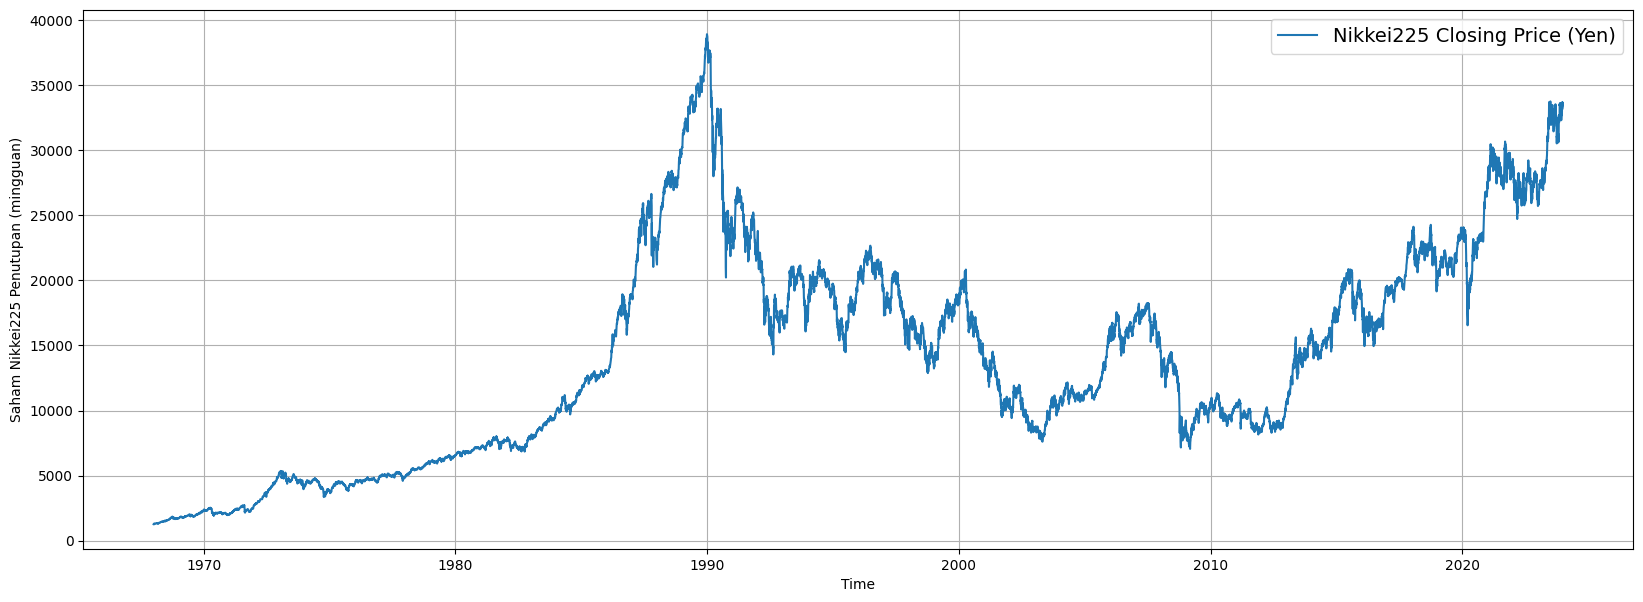

In [32]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

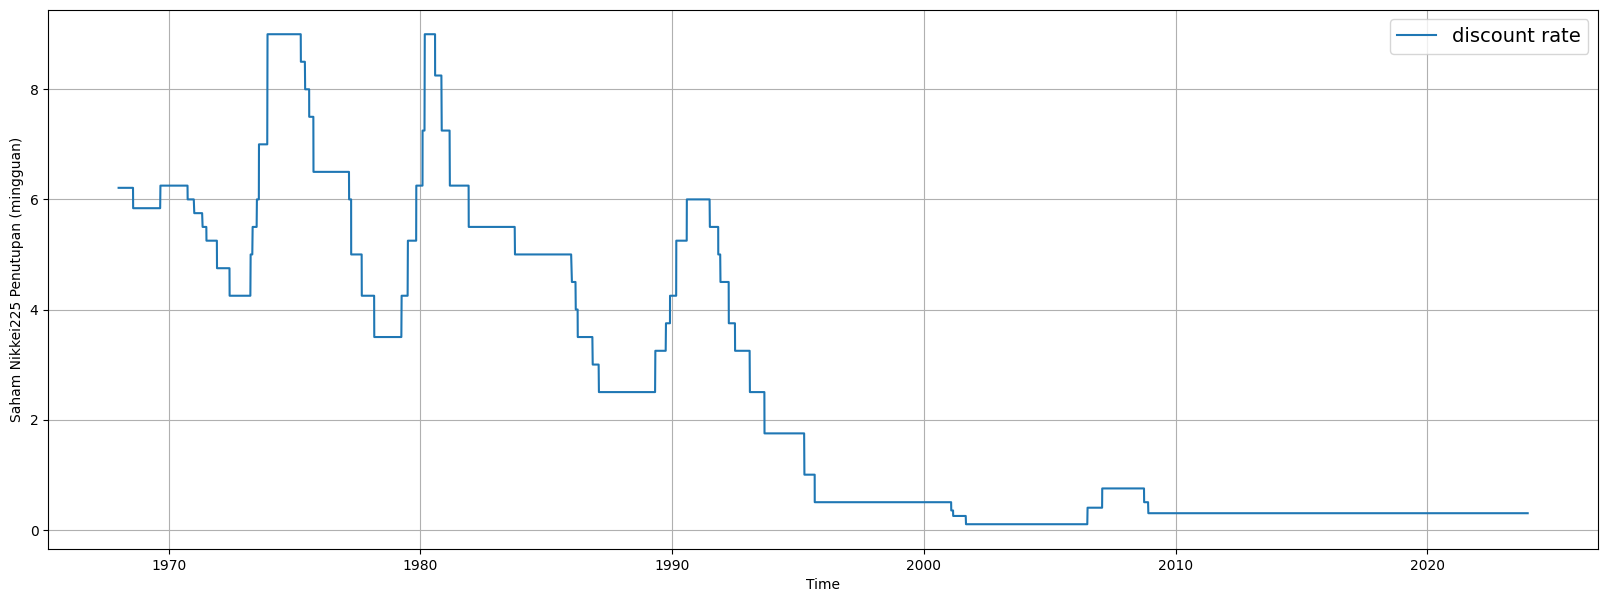

In [33]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


Visualisasi data money supply

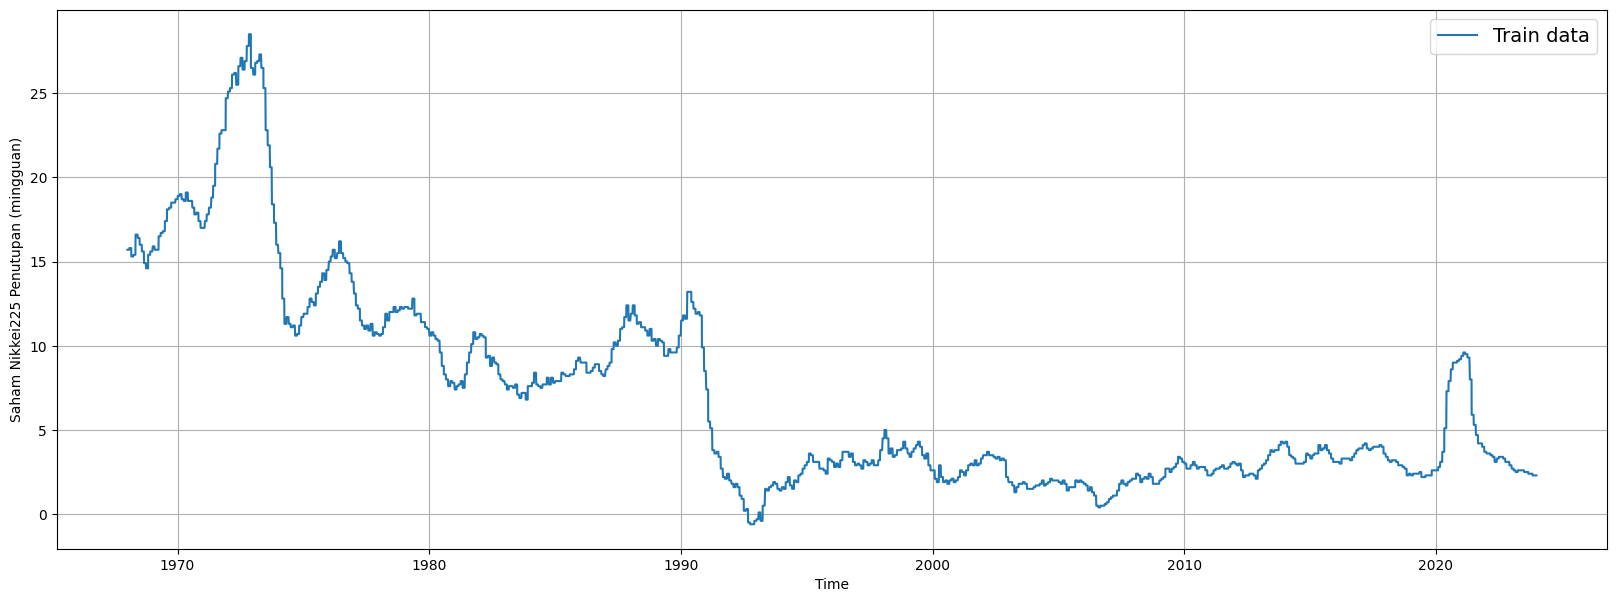

In [34]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data")


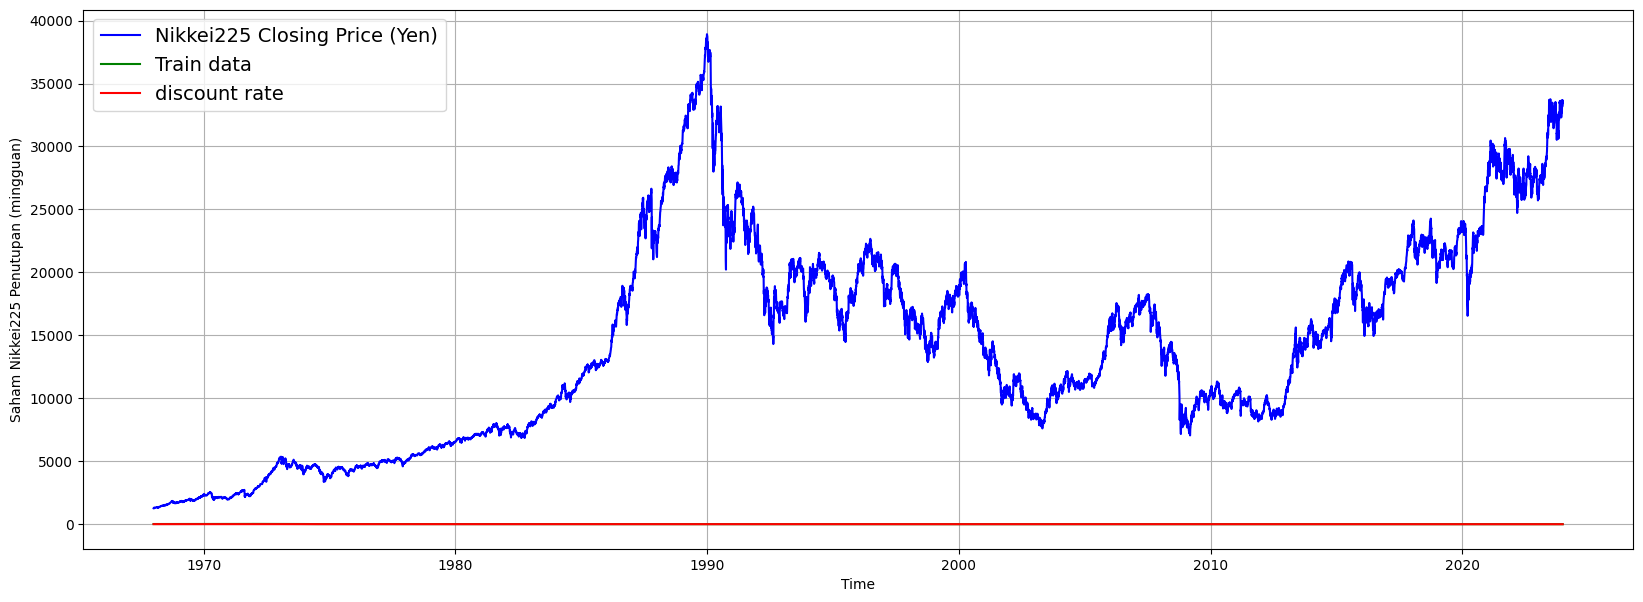

In [35]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [36]:
# Langkah 1 : konversi setiap fitur menjadi 2D-array dengan konfigurasi : (jumlah sample, 1)


In [37]:
from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [38]:
# Melakukan normalization
scaler.transform(nikkei225_close_multivariate_df)

array([[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
       [4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
       [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
       ...,
       [8.60964455e-01, 9.96563574e-02, 2.24719101e-02],
       [8.57203002e-01, 9.96563574e-02, 2.24719101e-02],
       [8.55199018e-01, 9.96563574e-02, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [39]:
normalized_data  = scaler.transform(nikkei225_close_multivariate_df)
normalized_data

array([[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
       [4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
       [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
       ...,
       [8.60964455e-01, 9.96563574e-02, 2.24719101e-02],
       [8.57203002e-01, 9.96563574e-02, 2.24719101e-02],
       [8.55199018e-01, 9.96563574e-02, 2.24719101e-02]])

In [40]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (13773, 3)


In [41]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892582e-04],
       [4.58438031e-04],
       ...,
       [8.60964455e-01],
       [8.57203002e-01],
       [8.55199018e-01]])

In [251]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [42]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_close_multivariate_df = pd.DataFrame(normalized_data, columns=nikkei225_close_multivariate_df.columns)


In [43]:
scaled_nikkei225_close_multivariate_df

,Closing Price (Yen),money_stock,discount_rate
0,0.000000,0.560137,0.686517
1,0.000428,0.560137,0.686517
2,0.000458,0.560137,0.686517
3,0.001054,0.560137,0.686517
4,0.001345,0.560137,0.686517
...,...,...,...
13768,0.849618,0.099656,0.022472
13769,0.850994,0.099656,0.022472
13770,0.860964,0.099656,0.022472
13771,0.857203,0.099656,0.022472


LAtihan denormalisasi

In [44]:

# # Fit the scaler to your data
# scaler = MinMaxScaler()
# scaler.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [45]:
len(scaler.transform(nikkei225_close_multivariate_df))

13773

In [46]:
scaler.transform(nikkei225_close_multivariate_df)[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892582e-04],
       [4.58438031e-04],
       ...,
       [8.60964455e-01],
       [8.57203002e-01],
       [8.55199018e-01]])

Visualisasi data yang di normalisasi

In [47]:
scaled_nikkei225_close_multivariate_df["money_stock"]

0        0.560137
1        0.560137
2        0.560137
3        0.560137
4        0.560137
           ...   
13768    0.099656
13769    0.099656
13770    0.099656
13771    0.099656
13772    0.099656
Name: money_stock, Length: 13773, dtype: float64

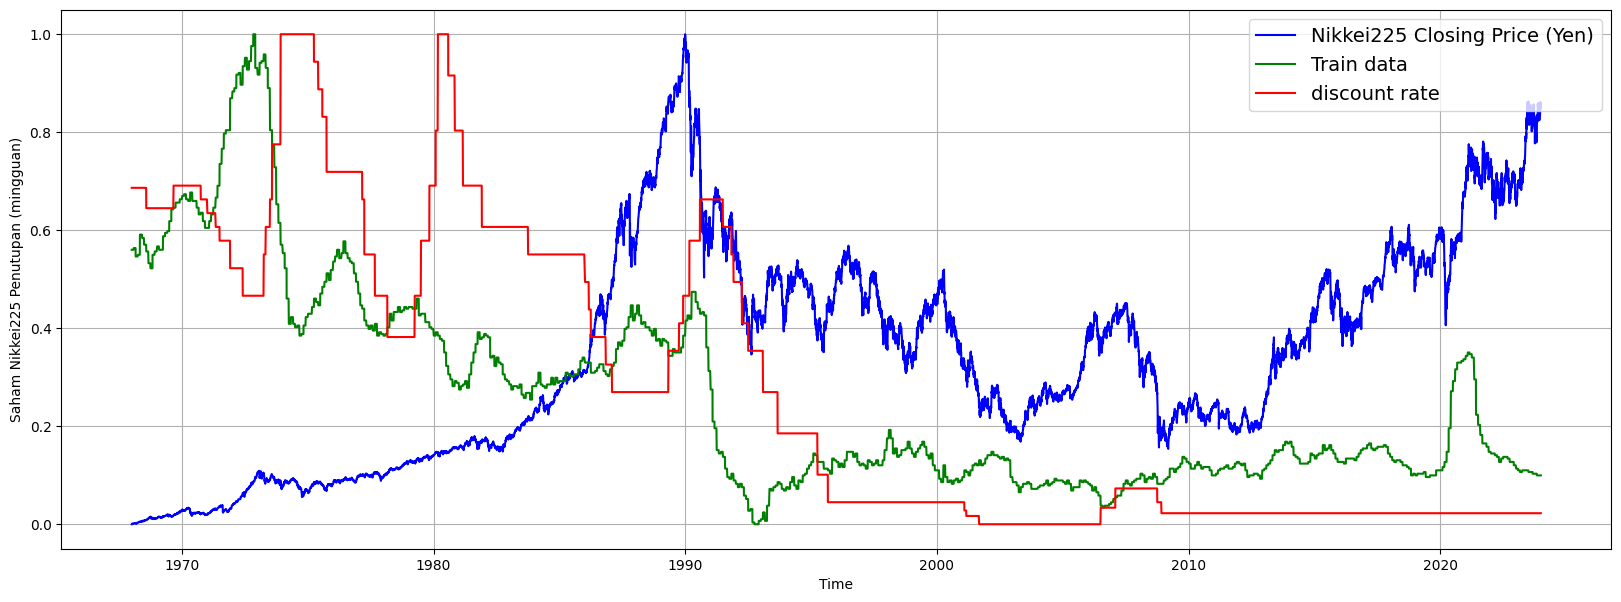

In [48]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["Closing Price (Yen)"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["money_stock"], format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


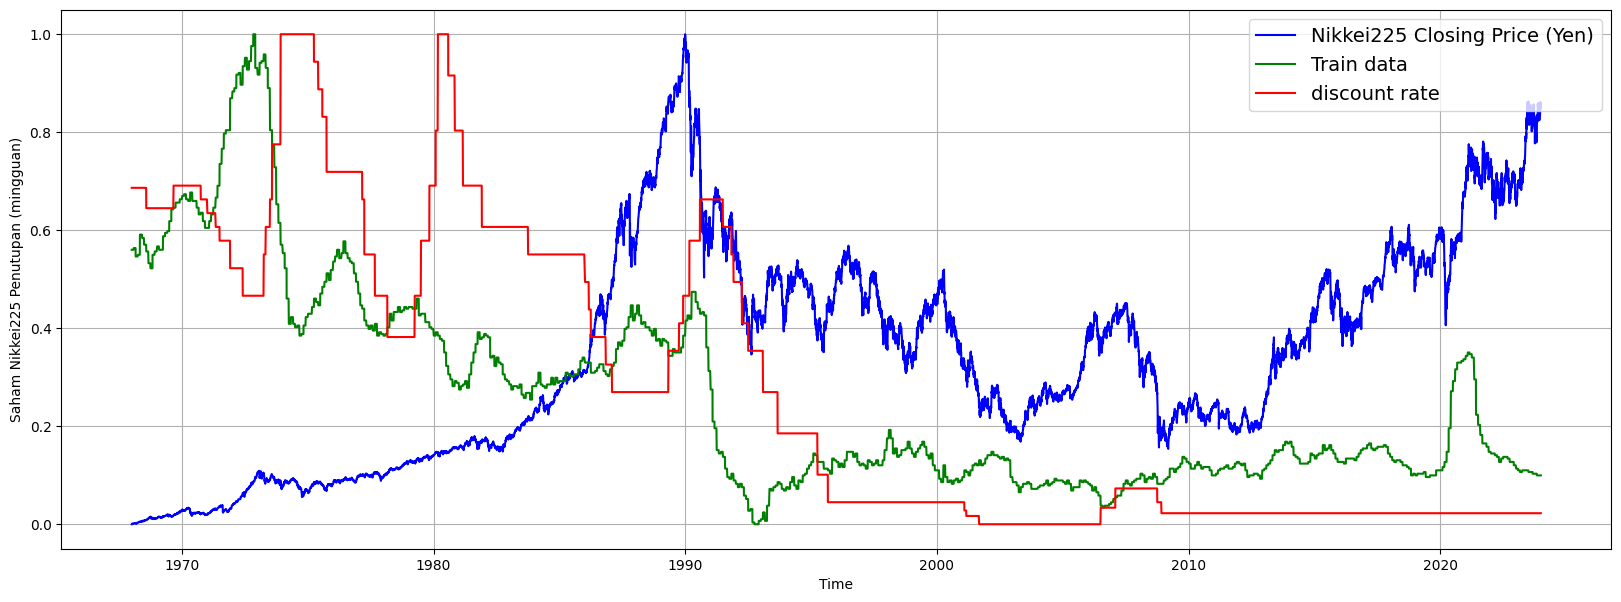

In [49]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,2], format = "-", label = "discount rate", color = 'r')


# menghitung korelasi antar time series

In [252]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892582e-04],
       [4.58438031e-04],
       ...,
       [8.60964455e-01],
       [8.57203002e-01],
       [8.55199018e-01]])

In [254]:
(normalized_data[:,0])

array([0.00000000e+00, 4.27892582e-04, 4.58438031e-04, ...,
       8.60964455e-01, 8.57203002e-01, 8.55199018e-01])

In [255]:
type(normalized_data[:,0])

numpy.ndarray

In [260]:
# menghitung koefisien korelasi dengan numpy

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,1])
print("Correlation coefficient saham dengan mooney supply: \n", corr_coef)

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,2])
print("Correlation coefficient saham dengan discount rate: \n", corr_coef)

Correlation coefficient saham dengan mooney supply: 
 [[ 1.        -0.4704392]
 [-0.4704392  1.       ]]
Correlation coefficient saham dengan discount rate: 
 [[ 1.         -0.48504944]
 [-0.48504944  1.        ]]


In [261]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.470439      -0.485049
money_stock                    -0.470439     1.000000       0.706540
discount_rate                  -0.485049     0.706540       1.000000


In [262]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "spearman")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.438711      -0.445539
money_stock                    -0.438711     1.000000       0.688417
discount_rate                  -0.445539     0.688417       1.000000


In [263]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "kendall")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.297523      -0.287226
money_stock                    -0.297523     1.000000       0.481280
discount_rate                  -0.287226     0.481280       1.000000


mungkin plotnya yang ini bisa di zoom supaya keliatan perbedaan data fluktuasi minigguan dan bulanannya

# Membuat dataset multivariate menjadi format sliding window dengan pendekatan multistep multivariate time series forecasting

In [169]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 30

SPLIT_SIZE = 0.9 # 80% data untuk train test 20% untuk test size

In [170]:
nikkei225_close_multivariate_df[:2]

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.270020,15.7,6.21
1968-01-05,1282.380005,15.7,6.21


In [171]:
scaled_nikkei225_close_multivariate_df[:2]

,Closing Price (Yen),money_stock,discount_rate
0,0.000000,0.560137,0.686517
1,0.000428,0.560137,0.686517


membuat window dan horizon multivariate

In [172]:

# データ数
sample_size = len(scaled_nikkei225_close_multivariate_df) - WINDOW_SIZE
# 予測に用いる期間
train_size = int(sample_size*SPLIT_SIZE)
test_size = sample_size - train_size

In [173]:
# データセットを作る関数

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=7, HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - HORIZON + 1):
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE : i + WINDOW_SIZE + HORIZON])
    _X = np.array(_X).reshape(len(_X), WINDOW_SIZE, 1)
    _y = np.array(_y).reshape(len(_y), HORIZON, 1)

    return _X, _y

In [174]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_close_multivariate_df.columns)

# 最小0、最大1に正規化
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_close_multivariate_df[columns[i]]))
Xs = np.array(Xs)

X_nikkei, y_nikkei = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_moneyStock, y_moneyStock = make_dataset(Xs[1], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_discRate, y_discRate = make_dataset(Xs[2], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)


# 多変量LSTM用に各データを結合
X_concat = np.concatenate([X_nikkei, X_moneyStock, X_discRate], axis=2)
y_concat = np.concatenate([y_nikkei, y_moneyStock, y_discRate], axis=2)

In [175]:
full_windows = X_concat
full_labels = y_concat

In [176]:
len(full_windows), len(full_labels)

(13743, 13743)

In [177]:
(full_windows[1])

array([[4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
       [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
       [1.05366112e-03, 5.60137457e-01, 6.86516854e-01],
       [1.34450282e-03, 5.60137457e-01, 6.86516854e-01],
       [1.28022475e-03, 5.60137457e-01, 6.86516854e-01],
       [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
       [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
       [1.50652247e-03, 5.60137457e-01, 6.86516854e-01],
       [1.23427523e-03, 5.60137457e-01, 6.86516854e-01],
       [1.06827081e-03, 5.60137457e-01, 6.86516854e-01],
       [1.09642673e-03, 5.60137457e-01, 6.86516854e-01],
       [1.01408594e-03, 5.60137457e-01, 6.86516854e-01],
       [1.03480406e-03, 5.60137457e-01, 6.86516854e-01],
       [1.24596364e-03, 5.60137457e-01, 6.86516854e-01],
       [1.07145797e-03, 5.60137457e-01, 6.86516854e-01],
       [1.07305318e-03, 5.60137457e-01, 6.86516854e-01],
       [1.21993141e-03, 5.60137457e-01, 6.86516854e-01],
       [1.21993141e-03, 5.63573

In [178]:
full_windows[2], full_windows[3], full_windows[4]

(array([[4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
        [1.05366112e-03, 5.60137457e-01, 6.86516854e-01],
        [1.34450282e-03, 5.60137457e-01, 6.86516854e-01],
        [1.28022475e-03, 5.60137457e-01, 6.86516854e-01],
        [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
        [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
        [1.50652247e-03, 5.60137457e-01, 6.86516854e-01],
        [1.23427523e-03, 5.60137457e-01, 6.86516854e-01],
        [1.06827081e-03, 5.60137457e-01, 6.86516854e-01],
        [1.09642673e-03, 5.60137457e-01, 6.86516854e-01],
        [1.01408594e-03, 5.60137457e-01, 6.86516854e-01],
        [1.03480406e-03, 5.60137457e-01, 6.86516854e-01],
        [1.24596364e-03, 5.60137457e-01, 6.86516854e-01],
        [1.07145797e-03, 5.60137457e-01, 6.86516854e-01],
        [1.07305318e-03, 5.60137457e-01, 6.86516854e-01],
        [1.21993141e-03, 5.60137457e-01, 6.86516854e-01],
        [1.21993141e-03, 5.63573883e-01, 6.86516854e-01],
        [1.376

In [179]:
full_labels[1]

array([[0.00202924, 0.56357388, 0.68651685]])

In [180]:
full_windows.shape

(13743, 30, 3)

format training atau test data pada window/fitur adalah (jumlah sample, ukuran window, jumlah variable)

In [181]:
full_labels.shape

(13743, 1, 3)

format training atau test data pada label adalah (jumlah sample, jumlah variabel)

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [182]:
(sample_size), (train_size), (test_size)

(13743, 12368, 1375)

In [183]:
train_windows = full_windows[:train_size]
test_windows = full_windows[train_size-1:]

train_labels = full_labels[:train_size]
test_labels = full_labels[train_size-1:]

In [184]:
"windows", train_windows[:3], "Labels",test_labels[:3]

('windows',
 array([[[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
         [4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
         [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
         [1.05366112e-03, 5.60137457e-01, 6.86516854e-01],
         [1.34450282e-03, 5.60137457e-01, 6.86516854e-01],
         [1.28022475e-03, 5.60137457e-01, 6.86516854e-01],
         [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
         [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
         [1.50652247e-03, 5.60137457e-01, 6.86516854e-01],
         [1.23427523e-03, 5.60137457e-01, 6.86516854e-01],
         [1.06827081e-03, 5.60137457e-01, 6.86516854e-01],
         [1.09642673e-03, 5.60137457e-01, 6.86516854e-01],
         [1.01408594e-03, 5.60137457e-01, 6.86516854e-01],
         [1.03480406e-03, 5.60137457e-01, 6.86516854e-01],
         [1.24596364e-03, 5.60137457e-01, 6.86516854e-01],
         [1.07145797e-03, 5.60137457e-01, 6.86516854e-01],
         [1.07305318e-03, 5.60137457e-01, 6.

# LANJUT BIKIN FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [185]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [186]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # mape akan digunakan, yang disarankan jangan digunakan adalah sMAPE
  #mase = mean_absolute_scaled_error(y_true, y_pred) #tidak digunakan

  # kalkulasi nilai R-square
  #from sklearn.metrics import r2_score
  #Rsquare = r2_score(y_true, y_pred)

  # Calculate the mean of the true values
  y_true_mean = tf.reduce_mean(y_true, axis=0)

  # Calculate the total sum of squares (SS_tot)
  SS_tot = tf.reduce_sum(tf.square(y_true - y_true_mean))

  # Calculate the sum of squares of the residuals (SS_res)
  SS_res = tf.reduce_sum(tf.square(y_true - y_pred))

  # Calculate the R-squared value
  Rsquare = 1 - (SS_res / SS_tot)


  # memperhitungkan berbagai ukuran metrics
  # (artinya untuk horizon yang lebih besar akan menghasilkan metrics (ex: MAE) yang berukuran dimensi lebih besar,
  # sehingga perlu di lakukan tf.reduce_mean lebih lanjut supaya menghasilkan single value metrics)

  # Calculate various metrics
  # (meaning for larger horizon will produce metrics (ex: MAE) with larger dimension,
  # so tf.reduce_mean is needed to produce single value metrics)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    #mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          #"mase" : mase.numpy(),
          "R-square" : Rsquare}


# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [187]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    verbose = 1,
                                                                    save_best_only = True)

# Model 0 : Keras Encoder & Decoder

In [188]:
train_windows.shape

(12368, 30, 3)

In [189]:
train_windows[0:2]

array([[[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
        [4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
        [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
        [1.05366112e-03, 5.60137457e-01, 6.86516854e-01],
        [1.34450282e-03, 5.60137457e-01, 6.86516854e-01],
        [1.28022475e-03, 5.60137457e-01, 6.86516854e-01],
        [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
        [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
        [1.50652247e-03, 5.60137457e-01, 6.86516854e-01],
        [1.23427523e-03, 5.60137457e-01, 6.86516854e-01],
        [1.06827081e-03, 5.60137457e-01, 6.86516854e-01],
        [1.09642673e-03, 5.60137457e-01, 6.86516854e-01],
        [1.01408594e-03, 5.60137457e-01, 6.86516854e-01],
        [1.03480406e-03, 5.60137457e-01, 6.86516854e-01],
        [1.24596364e-03, 5.60137457e-01, 6.86516854e-01],
        [1.07145797e-03, 5.60137457e-01, 6.86516854e-01],
        [1.07305318e-03, 5.60137457e-01, 6.86516854e-01],
        [1.219

In [190]:
train_labels[0:2]

array([[[0.00200188, 0.56357388, 0.68651685]],

       [[0.00202924, 0.56357388, 0.68651685]]])

In [191]:
train_labels.shape

(12368, 1, 3)

In [192]:
test_windows.shape

(1376, 30, 3)

In [193]:
test_labels.shape

(1376, 1, 3)

In [194]:
# keterangan jumlah feature
test_labels.shape[2]

3

Mulai membuat model Keras

In [195]:
import tensorflow as tf
from tensorflow.keras import layers

In [196]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array, hstack
import numpy as np

In [197]:
def define_model():
  #define the input data shape
  encoder_inputs = Input(shape = (WINDOW_SIZE, train_windows.shape[2]))

  # use single BILSTM as Encoder
  #Here we can use bigger network also like one BILSTM with reutrn_sequences = True and
  # Other BILSTM with return_sequences = False
  # OR CNN, CNN-LSTM, and so many
  encoder = (LSTM(units = 128, return_sequences=True))(encoder_inputs)

  # apply RepeatVector to get the result for multiple time steps (here out output_timesteps = 2)
  # for this step decoder operation start
  #repeat_output = RepeatVector(output_timesteps)(encoder)
  decoder = (LSTM(units = 64, return_sequences=False))(encoder)

  # use TimeDistributed layer to get multiple output features
  out = Dense(test_labels.shape[2])(decoder)
  #out = TimeDistributed(Dense(output_features))(decoder)
  model = Model(encoder_inputs , out)

  # compile the model
  model.compile(loss = 'mae', optimizer = 'adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  model.summary()
  return model

In [198]:
# call the model
model_0 = define_model()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 30, 3)]           0         
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           67584     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 117187 (457.76 KB)
Trainable params: 117187 (457.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [199]:
# fit the model
model_0.fit(train_windows,
            train_labels,
            epochs = 10,
            batch_size=128,
            verbose = 1,
            validation_data = (test_windows, test_labels)
            )



Epoch 1/10
97/97 [==============================] - 21s 176ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - val_loss: 0.2195 - val_mean_absolute_error: 0.2184
Epoch 2/10
97/97 [==============================] - 14s 148ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - val_loss: 0.1998 - val_mean_absolute_error: 0.1987
Epoch 3/10
97/97 [==============================] - 14s 148ms/step - loss: 0.2014 - mean_absolute_error: 0.2013 - val_loss: 0.2106 - val_mean_absolute_error: 0.2095
Epoch 4/10
97/97 [==============================] - 14s 148ms/step - loss: 0.2009 - mean_absolute_error: 0.2008 - val_loss: 0.2050 - val_mean_absolute_error: 0.2040
Epoch 5/10
97/97 [==============================] - 14s 147ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - val_loss: 0.2287 - val_mean_absolute_error: 0.2276
Epoch 6/10
97/97 [==============================] - 15s 156ms/step - loss: 0.2010 - mean_absolute_error: 0.2009 - val_loss: 0.2183 - val_mean_absolute_error: 0.2173
Epoch 7/10

In [200]:
# mengevaluasi model 6 dari epochs terakhir
model_0.evaluate(test_windows, test_labels)

43/43 [==============================] - 1s 21ms/step - loss: 0.2212 - mean_absolute_error: 0.2212


[0.22122806310653687, 0.22122806310653687]

In [201]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_0_preds = tf.squeeze(model_0.predict(test_windows))
model_0_preds



43/43 [==============================] - 2s 20ms/step


<tf.Tensor: shape=(1376, 3), dtype=float32, numpy=
array([[0.29579633, 0.15317316, 0.27016988],
       [0.2958143 , 0.15317717, 0.2701911 ],
       [0.29582685, 0.1531755 , 0.27020568],
       ...,
       [0.29618877, 0.15137501, 0.27133155],
       [0.29615498, 0.1513462 , 0.27131253],
       [0.2961399 , 0.15133233, 0.27131215]], dtype=float32)>

In [202]:
model_0_preds[:,2]

<tf.Tensor: shape=(1376,), dtype=float32, numpy=
array([0.27016988, 0.2701911 , 0.27020568, ..., 0.27133155, 0.27131253,
       0.27131215], dtype=float32)>

In [203]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_0_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_0_preds)

model_0_results

{'mae': 0.22122814,
 'mse': 0.06837606,
 'rmse': 0.25699645,
 'mape': 397.52783,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-11.089343>}

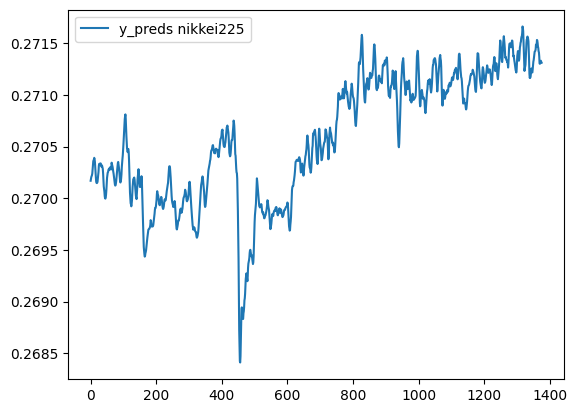

In [204]:
import matplotlib.pyplot as plt

plt.plot(model_0_preds[:,2], label='y_preds nikkei225')

#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

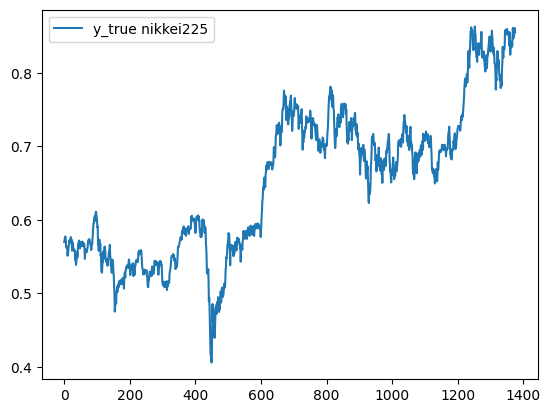

In [205]:
plt.plot(test_labels[:, :, 0], label='y_true nikkei225')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Model 1: Membuat model Convolutional (Conv1D)

In [206]:
# import library untuk mmebuat model

import tensorflow as tf
from tensorflow.keras import layers

In [207]:
train_windows.shape

(12368, 30, 3)

In [208]:
train_labels.shape

(12368, 1, 3)

In [209]:
test_windows.shape

(1376, 30, 3)

In [210]:
test_labels.shape

(1376, 1, 3)

In [211]:
test_labels.shape[2]

3

In [212]:
tf.random.set_seed(42)

#create Conv1D model
model_1 = tf.keras.models.Sequential([
    #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    tf.keras.layers.Conv1D(filters = 256, kernel_size = 10, strides = 1, padding ="causal", activation = "relu"),
    tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
    tf.keras.layers.Dense(test_labels.shape[2], activation = "relu")
    #filters adalah jumlah hidden unit dalam layers tersebut
    # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
    # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
], name = "model_1_conv1D")

#compile model 1
model_1.compile(loss="mae",
                optimizer = tf.keras.optimizers.SGD())

# fit
model_1.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.2985
Epoch 1: val_loss improved from inf to 0.27823, saving model to model_experiments/model_1_conv1D
97/97 [==============================] - 4s 33ms/step - loss: 0.2985 - val_loss: 0.2782
Epoch 2/10
97/97 [==============================] - ETA: 0s - loss: 0.2883
Epoch 2: val_loss did not improve from 0.27823
97/97 [==============================] - 1s 14ms/step - loss: 0.2883 - val_loss: 0.3122
Epoch 3/10
95/97 [============================>.] - ETA: 0s - loss: 0.2850
Epoch 3: val_loss did not improve from 0.27823
97/97 [==============================] - 1s 12ms/step - loss: 0.2850 - val_loss: 0.3305
Epoch 4/10
94/97 [============================>.] - ETA: 0s - loss: 0.2848
Epoch 4: val_loss did not improve from 0.27823
97/97 [==============================] - 1s 12ms/step - loss: 0.2848 - val_loss: 0.3329
Epoch 5/10
95/97 [============================>.] - ETA: 0s - loss: 0.2846
Epoch 5: val_loss did not improve f

In [213]:
model_1.summary()

Model: "model_1_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 30, 256)           7936      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_9 (Dense)             (None, 3)                 771       
                                                                 
Total params: 8707 (34.01 KB)
Trainable params: 8707 (34.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [214]:
# mengevaluasi model 6 dari epochs terakhir
model_1.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 3ms/step - loss: 0.3408


0.3407861888408661

In [215]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_1 = tf.keras.models.load_model("model_experiments/model_1_conv1D")
model_1.evaluate(test_windows, test_labels)


43/43 [==============================] - 0s 3ms/step - loss: 0.2782


0.2782294750213623

In [216]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds



43/43 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(1376, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [217]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)

model_1_results

{'mae': 0.27822948,
 'mse': 0.15611906,
 'rmse': 0.39047116,
 'mape': 100.0,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-26.602907>}

In [218]:
model_1_results

{'mae': 0.27822948,
 'mse': 0.15611906,
 'rmse': 0.39047116,
 'mape': 100.0,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-26.602907>}

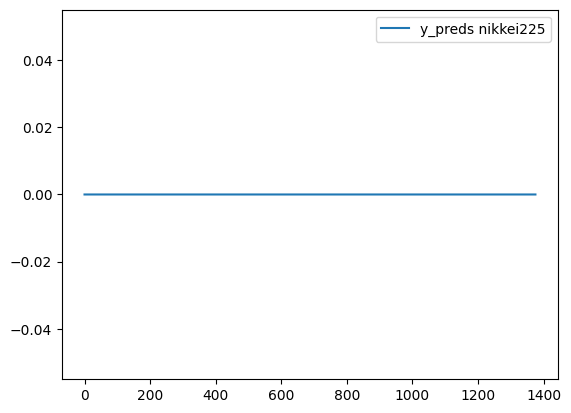

In [249]:
import matplotlib.pyplot as plt

plt.plot(model_1_preds[:,0], label='y_preds nikkei225')

#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

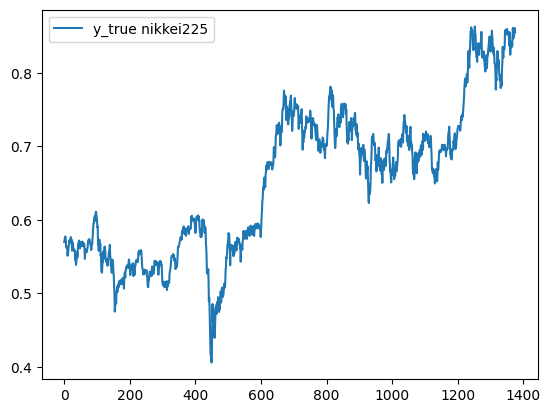

In [220]:
plt.plot(test_labels[:, :, 0], label='y_true nikkei225')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Model 2 : LSTM

In [221]:
train_windows.shape[2]

3

In [222]:
model_2 = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(train_windows.shape[1], train_windows.shape[2]), return_sequences = True, activation = "sigmoid"),
        #tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(64, return_sequences=True, activation = "sigmoid"),
        tf.keras.layers.LSTM(64, return_sequences=False, activation = "sigmoid"),

        tf.keras.layers.Dense(test_labels.shape[2])
        ], name = "model_2_LSTM")



#compile model 2
model_2.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.2030
Epoch 1: val_loss improved from inf to 0.19655, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 27s 236ms/step - loss: 0.2030 - val_loss: 0.1965
Epoch 2/10
97/97 [==============================] - ETA: 0s - loss: 0.2030
Epoch 2: val_loss improved from 0.19655 to 0.18071, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 24s 252ms/step - loss: 0.2030 - val_loss: 0.1807
Epoch 3/10
97/97 [==============================] - ETA: 0s - loss: 0.2018
Epoch 3: val_loss did not improve from 0.18071
97/97 [==============================] - 20s 208ms/step - loss: 0.2018 - val_loss: 0.2162
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 0.2013
Epoch 4: val_loss did not improve from 0.18071
97/97 [==============================] - 19s 198ms/step - loss: 0.2013 - val_loss: 0.1927
Epoch 5/10
97/97 [==============================] - 

In [223]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 128)           67584     
                                                                 
 lstm_19 (LSTM)              (None, 30, 64)            49408     
                                                                 
 lstm_20 (LSTM)              (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                                                                 
Total params: 150211 (586.76 KB)
Trainable params: 150211 (586.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [224]:
# mengevaluasi model 6 dari epochs terakhir
model_2.evaluate(test_windows, test_labels)

43/43 [==============================] - 1s 30ms/step - loss: 0.2241


0.2240760773420334

In [225]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_2 = tf.keras.models.load_model("model_experiments/model_2_LSTM")
model_2.evaluate(test_windows, test_labels)


43/43 [==============================] - 2s 26ms/step - loss: 0.1807


0.18070577085018158

In [226]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds



43/43 [==============================] - 2s 42ms/step


<tf.Tensor: shape=(1376, 3), dtype=float32, numpy=
array([[0.30201754, 0.14270498, 0.15866843],
       [0.30201736, 0.14270568, 0.1586679 ],
       [0.30201778, 0.14270498, 0.15866812],
       ...,
       [0.3020886 , 0.14266884, 0.15870441],
       [0.30208984, 0.14266653, 0.15870565],
       [0.30208984, 0.14266805, 0.15870515]], dtype=float32)>

In [227]:
model_2_preds[:,2]

<tf.Tensor: shape=(1376,), dtype=float32, numpy=
array([0.15866843, 0.1586679 , 0.15866812, ..., 0.15870441, 0.15870565,
       0.15870515], dtype=float32)>

In [228]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_2_preds)

model_2_results

{'mae': 0.18070577,
 'mse': 0.052784476,
 'rmse': 0.22304009,
 'mape': 229.57668,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-8.332648>}

In [229]:
tf.squeeze(test_labels[:, :, 0])

<tf.Tensor: shape=(1376,), dtype=float64, numpy=
array([0.56975266, 0.57297019, 0.57541352, ..., 0.86096445, 0.857203  ,
       0.85519902])>

In [230]:
test_labels[:, :, 0]

array([[0.56975266],
       [0.57297019],
       [0.57541352],
       ...,
       [0.86096445],
       [0.857203  ],
       [0.85519902]])

In [231]:
model_1_results

{'mae': 0.27822948,
 'mse': 0.15611906,
 'rmse': 0.39047116,
 'mape': 100.0,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-26.602907>}

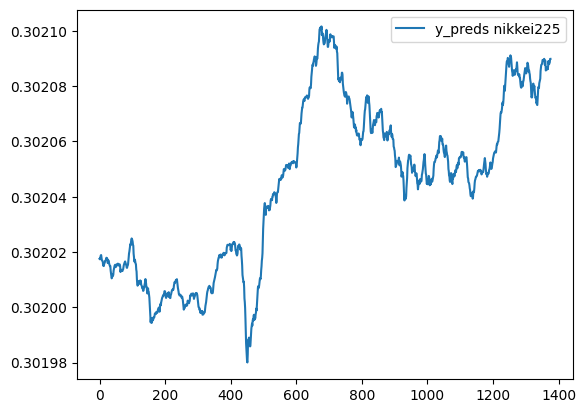

In [232]:
import matplotlib.pyplot as plt

plt.plot(model_2_preds[:,0], label='y_preds nikkei225')

#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

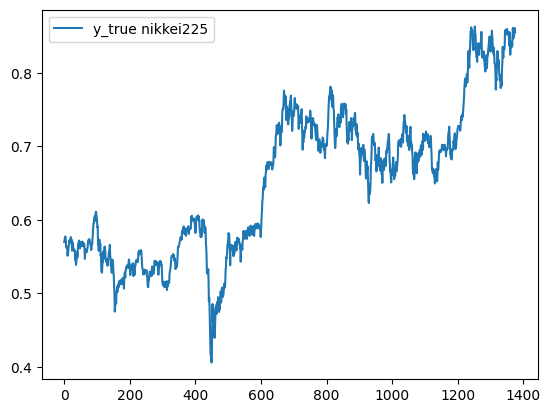

In [233]:
plt.plot(test_labels[:, :, 0], label='y_true nikkei225')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Model 3 : CNN_LSTM

In [234]:
model_3 = tf.keras.models.Sequential([
  # YOUR CODE HERE.
  tf.keras.layers.Conv1D(filters=128, kernel_size=10, strides=1, padding="causal", activation="relu",
                          input_shape=[train_windows.shape[1], train_windows.shape[2]]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(128, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=False),

  tf.keras.layers.Dense(test_labels.shape[2]),
  ], name = "model_3_CNN-LSTM")



#compile model 3
model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.2044
Epoch 1: val_loss improved from inf to 0.20225, saving model to model_experiments/model_3_CNN-LSTM
97/97 [==============================] - 41s 365ms/step - loss: 0.2044 - val_loss: 0.2022
Epoch 2/10
97/97 [==============================] - ETA: 0s - loss: 0.2012
Epoch 2: val_loss improved from 0.20225 to 0.19857, saving model to model_experiments/model_3_CNN-LSTM
97/97 [==============================] - 34s 352ms/step - loss: 0.2012 - val_loss: 0.1986
Epoch 3/10
97/97 [==============================] - ETA: 0s - loss: 0.2014
Epoch 3: val_loss did not improve from 0.19857
97/97 [==============================] - 23s 241ms/step - loss: 0.2014 - val_loss: 0.2106
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 0.2008
Epoch 4: val_loss did not improve from 0.19857
97/97 [==============================] - 22s 222ms/step - loss: 0.2008 - val_loss: 0.2080
Epoch 5/10
97/97 [==========================

In [235]:
model_3.summary()

Model: "model_3_CNN-LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 30, 128)           3968      
                                                                 
 lstm_21 (LSTM)              (None, 30, 64)            49408     
                                                                 
 lstm_22 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 201795 (788.26 KB)
Trainable params: 201795 (788.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [236]:
# mengevaluasi model 6 dari epochs terakhir
model_3.evaluate(test_windows, test_labels)

43/43 [==============================] - 1s 28ms/step - loss: 0.2236


0.22358226776123047

In [237]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_3 = tf.keras.models.load_model("model_experiments/model_3_CNN-LSTM")
model_3.evaluate(test_windows, test_labels)


43/43 [==============================] - 3s 31ms/step - loss: 0.1986


0.1985732913017273

In [238]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds



43/43 [==============================] - 3s 31ms/step


<tf.Tensor: shape=(1376, 3), dtype=float32, numpy=
array([[0.31332225, 0.15149361, 0.22114728],
       [0.31340373, 0.15152788, 0.22121166],
       [0.31348068, 0.15155967, 0.22127321],
       ...,
       [0.32904974, 0.15769376, 0.23368512],
       [0.32901224, 0.15767433, 0.23364612],
       [0.32897356, 0.15765797, 0.2336014 ]], dtype=float32)>

In [239]:
model_3_preds[:,2]

<tf.Tensor: shape=(1376,), dtype=float32, numpy=
array([0.22114728, 0.22121166, 0.22127321, ..., 0.23368512, 0.23364612,
       0.2336014 ], dtype=float32)>

In [240]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)

model_3_results

{'mae': 0.1985734,
 'mse': 0.055968285,
 'rmse': 0.23148087,
 'mape': 330.31033,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-8.895565>}

In [241]:
tf.squeeze(test_labels[:, :, 0])

<tf.Tensor: shape=(1376,), dtype=float64, numpy=
array([0.56975266, 0.57297019, 0.57541352, ..., 0.86096445, 0.857203  ,
       0.85519902])>

In [242]:
test_labels[:, :, 0]

array([[0.56975266],
       [0.57297019],
       [0.57541352],
       ...,
       [0.86096445],
       [0.857203  ],
       [0.85519902]])

In [243]:
model_1_results

{'mae': 0.27822948,
 'mse': 0.15611906,
 'rmse': 0.39047116,
 'mape': 100.0,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-26.602907>}

In [244]:
model_3_results

{'mae': 0.1985734,
 'mse': 0.055968285,
 'rmse': 0.23148087,
 'mape': 330.31033,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-8.895565>}

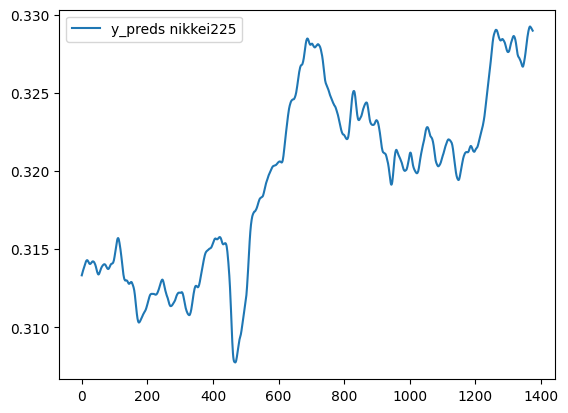

In [248]:
import matplotlib.pyplot as plt

plt.plot(model_3_preds[:,0], label='y_preds nikkei225')

#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

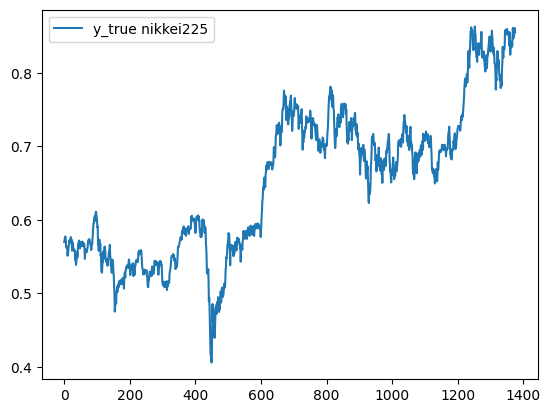

In [247]:
plt.plot(test_labels[:, :, 0], label='y_true nikkei225')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()